In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Inserciones

In [32]:
df_id = pd.read_csv("inserciones_id.csv")
df_usr = pd.read_csv("inserciones_username.csv")
df_dv_id = pd.read_csv("dv_inserciones_id.csv")
df_dv_usr = pd.read_csv("dv_inserciones_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.515660  1.040721  1.591078  2.107961   
1      hashing_cerrado_lineal  0.393770  0.825065  1.243642  1.662484   
2  hashing_cerrado_cuadratico  0.393981  0.791683  1.231418  1.652518   
3       hashing_cerrado_doble  0.401061  0.824973  1.255396  1.709809   
4          std::unordered_map  0.319688  0.635767  0.969322  1.291610   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  2.622918  3.175031  3.663325  4.296359  4.836089  ...  5.910464  6.534207   
1  2.074109  2.494582  2.881093  3.369949  3.776307  ...  4.588593  5.031280   
2  2.067120  2.493973  2.908795  3.367123  3.769376  ...  4.579836  5.033580   
3  2.146546  2.590724  2.994301  3.469588  3.892470  ...  4.727973  5.203588   
4  1.636390  1.965727  2.294577  2.671305  2.982883  ...  3.682414  4.095732   

      13000     14000     15000     16000     17000      18000      19000  \
0  

In [33]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="inserciones", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="inserciones", value_name="tiempo")

df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_inserciones", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_inserciones", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())


df_id_melted['inserciones'] = df_id_melted['inserciones'].astype(int)
df_usr_melted['inserciones'] = df_usr_melted['inserciones'].astype(int)

                         mapa inserciones    tiempo  tiempo_err
0             hashing_abierto        1000  0.515660    0.039888
1      hashing_cerrado_lineal        1000  0.393770    0.038685
2  hashing_cerrado_cuadratico        1000  0.393981    0.057144
3       hashing_cerrado_doble        1000  0.401061    0.091366
4          std::unordered_map        1000  0.319688    0.030010
                         mapa inserciones    tiempo  tiempo_err
0             hashing_abierto        1000  0.754869    0.080015
1      hashing_cerrado_lineal        1000  0.649753    0.071928
2  hashing_cerrado_cuadratico        1000  0.643722    0.067754
3       hashing_cerrado_doble        1000  0.824341    0.093024
4          std::unordered_map        1000  0.356311    0.026928


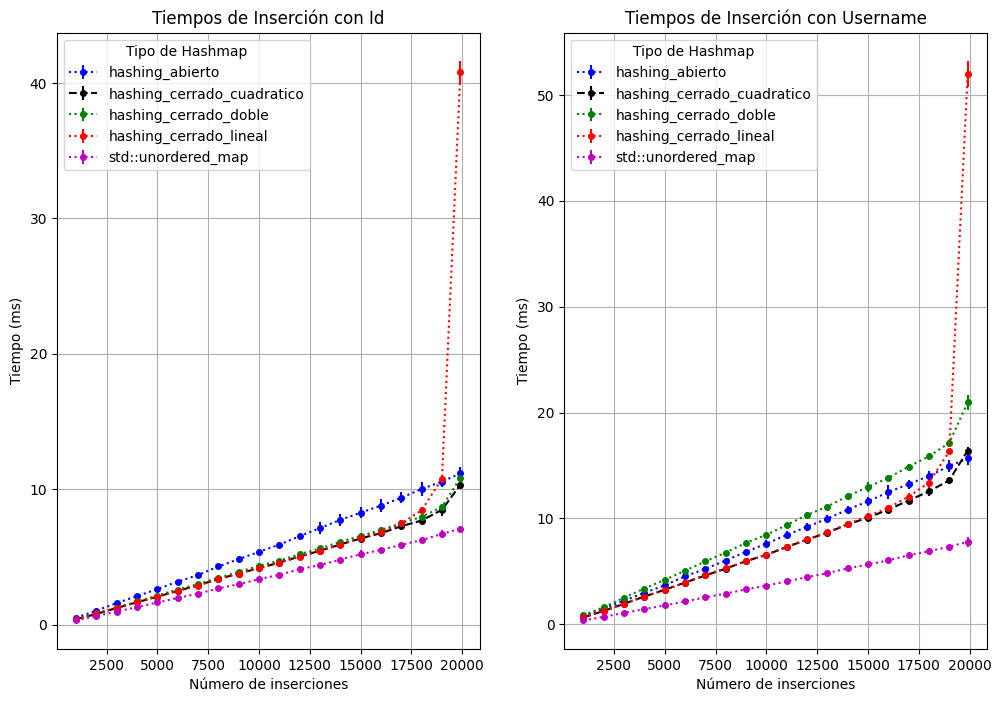

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de inserciones")

axes[0].set(title="Tiempos de Inserción con Id")
axes[1].set(title="Tiempos de Inserción con Username")

plt.savefig("inserciones.png", bbox_inches="tight")
plt.show()


# Busquedas Tipo 1

In [35]:
df_id = pd.read_csv("busquedas1_id.csv")
df_usr = pd.read_csv("busquedas1_username.csv")
df_dv_id = pd.read_csv("dv_busquedas1_id.csv")
df_dv_usr = pd.read_csv("dv_busquedas1_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa  0.300000  0.350000  0.400000  0.450000  \
0             hashing_abierto  1.413846  1.362189  1.404903  1.480337   
1      hashing_cerrado_lineal  1.200770  1.157467  1.264681  1.303289   
2  hashing_cerrado_cuadratico  1.273786  1.211643  1.239076  1.274570   
3       hashing_cerrado_doble  1.366454  1.263193  1.361221  1.343380   
4          std::unordered_map  0.638833  0.637396  0.697132  0.741310   

   0.500000  0.550000  0.600000  0.650000  0.700000  0.750000  0.800000  \
0  1.537657  1.513948  1.505225  1.559967  1.589001  1.630111  1.642534   
1  1.354276  1.343957  1.341894  1.352902  1.405484  1.463887  1.527134   
2  1.361624  1.320557  1.286611  1.311656  1.359841  1.435526  1.440904   
3  1.450695  1.450982  1.430452  1.431787  1.470544  1.597914  1.529700   
4  0.805977  0.814991  0.814800  0.861042  0.900081  0.952492  0.966241   

   0.850000  0.900000  0.950000  
0  1.687510  1.696273  1.720057  
1  1.600197  1.710075  2.066573  
2  1.466

In [36]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="factor", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="factor", value_name="tiempo")
df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]



df_id_melted["factor"] = df_id_melted["factor"].astype(float)
df_usr_melted["factor"] = df_usr_melted["factor"].astype(float)

#df_id_melted = df_id_melted.drop(df_id_melted[df_id_melted["busquedas"] > 15000].index)
#df_usr_melted = df_usr_melted.drop(df_usr_melted[df_usr_melted["busquedas"] > 15000].index)

print(df_id_melted.head())
print(df_usr_melted.head())


                         mapa  factor    tiempo  tiempo_err
0             hashing_abierto     0.3  1.413846    0.120963
1      hashing_cerrado_lineal     0.3  1.200770    0.101622
2  hashing_cerrado_cuadratico     0.3  1.273786    0.121947
3       hashing_cerrado_doble     0.3  1.366454    0.153125
4          std::unordered_map     0.3  0.638833    0.101380
                         mapa  factor    tiempo  tiempo_err
0             hashing_abierto     0.3  2.464455    0.088218
1      hashing_cerrado_lineal     0.3  2.464695    0.130090
2  hashing_cerrado_cuadratico     0.3  2.474367    0.137683
3       hashing_cerrado_doble     0.3  3.436388    0.212220
4          std::unordered_map     0.3  1.156542    0.074928


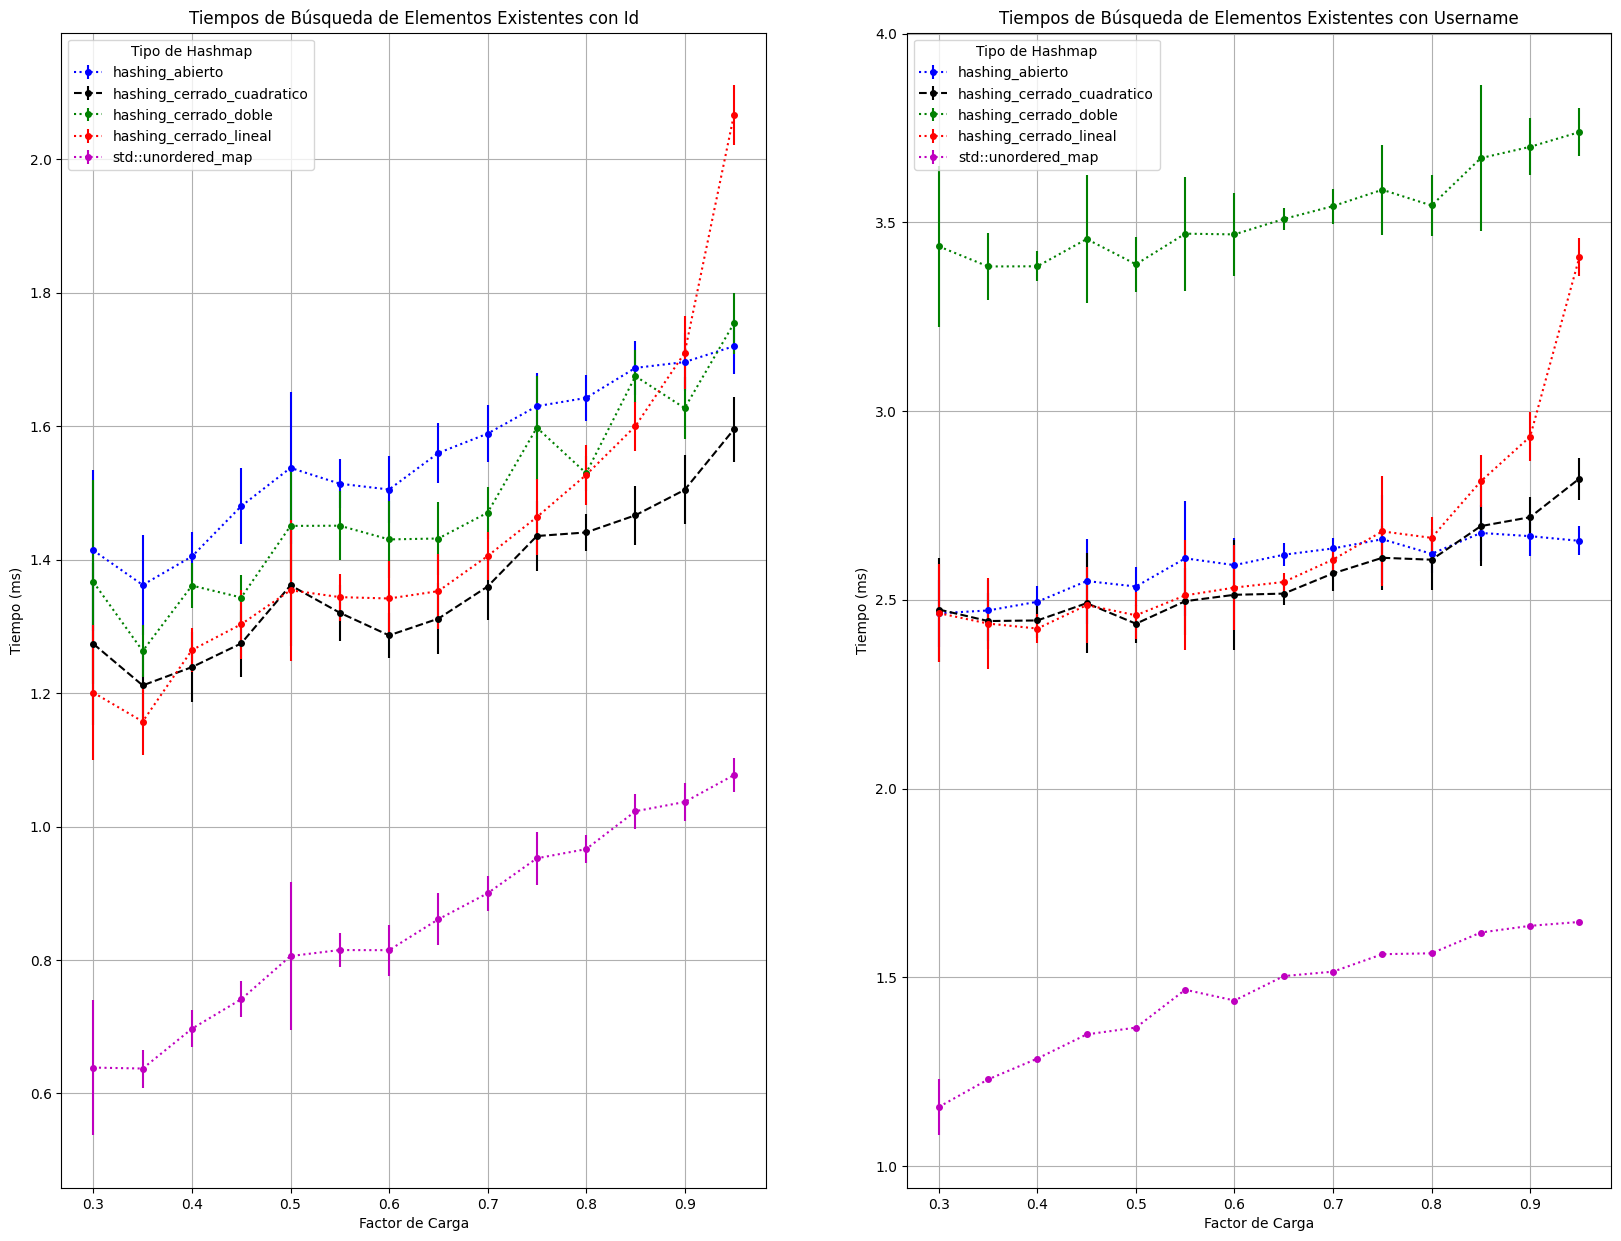

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["factor"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["factor"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i],yerr=grp["tiempo_err"])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Factor de Carga")

axes[0].set(title="Tiempos de Búsqueda de Elementos Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos Existentes con Username")

plt.savefig("busquedas_1.png", bbox_inches="tight")
plt.show()

# Busquedas Tipo 2

In [38]:
df_id = pd.read_csv("busquedas2_id.csv")
df_usr = pd.read_csv("busquedas2_username.csv")
df_dv_id = pd.read_csv("dv_busquedas2_id.csv")
df_dv_usr = pd.read_csv("dv_busquedas2_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa  0.300000  0.350000  0.400000  0.450000  \
0             hashing_abierto  0.401558  0.382729  0.410718  0.397177   
1      hashing_cerrado_lineal  0.385268  0.396570  0.437018  0.440611   
2  hashing_cerrado_cuadratico  0.378418  0.377205  0.428537  0.418265   
3       hashing_cerrado_doble  0.448210  0.432346  0.473109  0.479497   
4          std::unordered_map  0.403609  0.415490  0.458587  0.452613   

   0.500000  0.550000  0.600000  0.650000  0.700000  0.750000  0.800000  \
0  0.426934  0.447729  0.470859  0.502806  0.522973  0.549319  0.574882   
1  0.491803  0.541141  0.594620  0.665821  0.795733  0.977445  1.186257   
2  0.477556  0.505977  0.549052  0.596351  0.672510  0.766772  0.865283   
3  0.525857  0.565608  0.614809  0.680891  0.754546  0.854427  0.971485   
4  0.491582  0.542333  0.588383  0.644750  0.693244  0.770222  0.855267   

   0.850000  0.900000   0.950000  
0  0.621202  0.668417   0.724149  
1  1.936133  4.531551  14.858162  
2  1.

In [39]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="factor", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="factor", value_name="tiempo")
df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]



df_id_melted["factor"] = df_id_melted["factor"].astype(float)
df_usr_melted["factor"] = df_usr_melted["factor"].astype(float)

#df_id_melted = df_id_melted.drop(df_id_melted[df_id_melted["busquedas"] > 15000].index)
#df_usr_melted = df_usr_melted.drop(df_usr_melted[df_usr_melted["busquedas"] > 15000].index)

print(df_id_melted.head())
print(df_usr_melted.head())

                         mapa  factor    tiempo  tiempo_err
0             hashing_abierto     0.3  0.401558    0.071834
1      hashing_cerrado_lineal     0.3  0.385268    0.044939
2  hashing_cerrado_cuadratico     0.3  0.378418    0.084669
3       hashing_cerrado_doble     0.3  0.448210    0.078804
4          std::unordered_map     0.3  0.403609    0.090734
                         mapa  factor    tiempo  tiempo_err
0             hashing_abierto     0.3  1.311794    0.135989
1      hashing_cerrado_lineal     0.3  1.301741    0.090981
2  hashing_cerrado_cuadratico     0.3  1.296677    0.076445
3       hashing_cerrado_doble     0.3  2.174707    0.131810
4          std::unordered_map     0.3  0.487728    0.094343


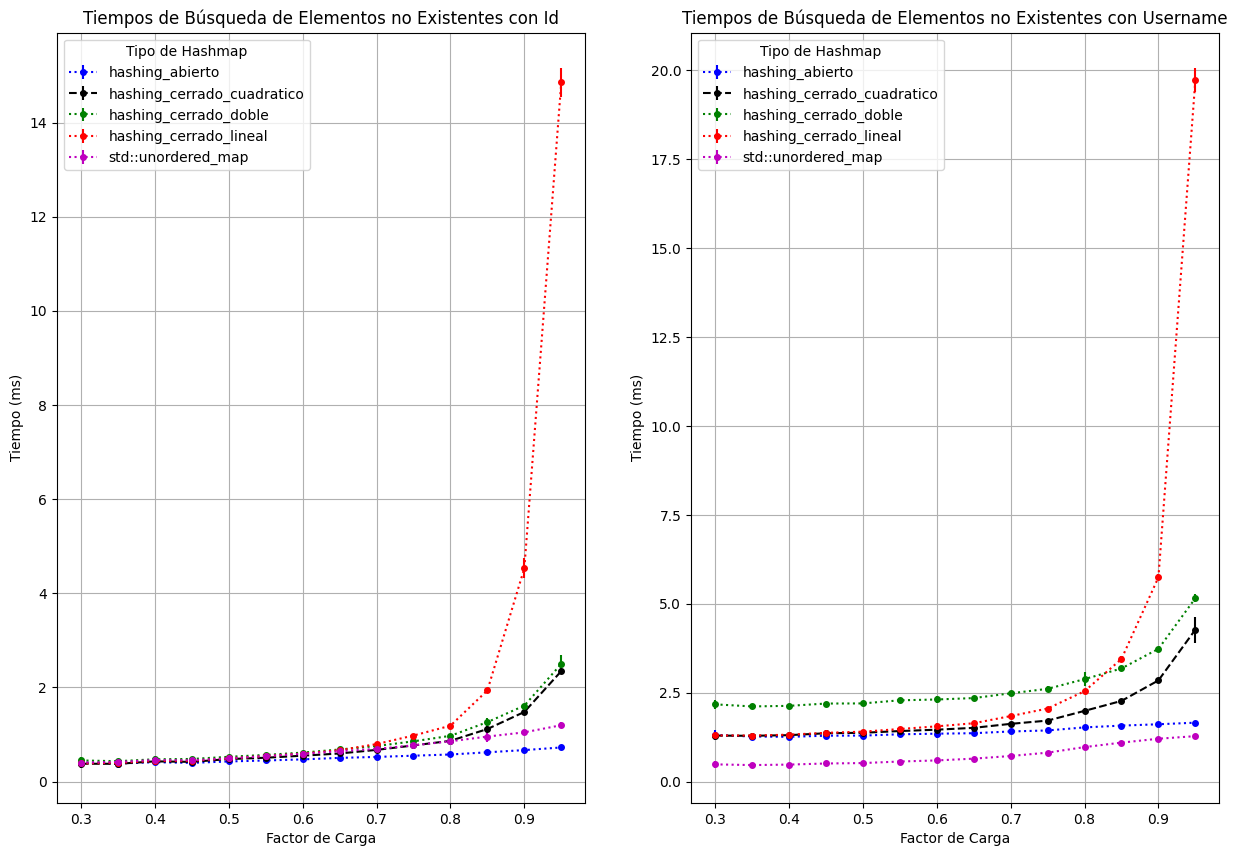

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))


styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["factor"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["factor"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1
    
for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Factor de Carga")

axes[0].set(title="Tiempos de Búsqueda de Elementos no Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos no Existentes con Username")

plt.savefig("busquedas_2.png", bbox_inches="tight")
plt.show()